<a href="https://colab.research.google.com/github/SinaBaniasadAzad/LSTM/blob/main/Training%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Generation

In [14]:
#@title Default title text
import numpy as np
import matplotlib.pyplot as plt

# Generate data
n = 500
t = np.linspace(0,20.0*np.pi,n)
X = np.sin(t) # X is already between -1 and 1, scaling normally needed

training and prediction

In [15]:
# Set window of past points for LSTM model
window = 10

# Split 80/20 into train/test data
last = int(n/5.0)
Xtrain = X[:-last]
Xtest = X[-last-window:]

# Store window number of points as a sequence
xin = []
next_X = []
for i in range(window,len(Xtrain)):
    xin.append(Xtrain[i-window:i])
    next_X.append(Xtrain[i])

# Reshape data to format for LSTM
xin, next_X = np.array(xin), np.array(next_X)
xin = xin.reshape(xin.shape[0], xin.shape[1], 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialize LSTM model
m = Sequential()
m.add(LSTM(units=50, return_sequences=True, input_shape=(xin.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer = 'adam', loss = 'mean_squared_error')

LSTM Model Training

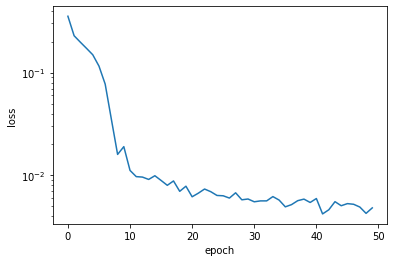

In [17]:
# Fit LSTM model
history = m.fit(xin, next_X, epochs = 50, batch_size = 50,verbose=0)

plt.figure()
plt.ylabel('loss'); plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

LSTM Prediction Validation

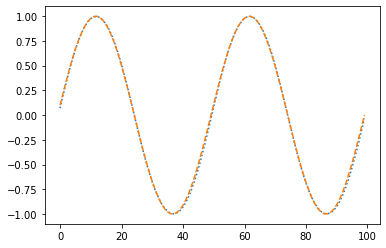

In [18]:
# Store "window" points as a sequence
xin = []
next_X1 = []
for i in range(window,len(Xtest)):
    xin.append(Xtest[i-window:i])
    next_X1.append(Xtest[i])

# Reshape data to format for LSTM
xin, next_X1 = np.array(xin), np.array(next_X1)
xin = xin.reshape((xin.shape[0], xin.shape[1], 1))

# Predict the next value (1 step ahead)
X_pred = m.predict(xin)

# Plot prediction vs actual for test data
plt.figure()
plt.plot(X_pred,':',label='LSTM')
plt.plot(next_X1,'--',label='Actual')

LSTM Forecast Validation

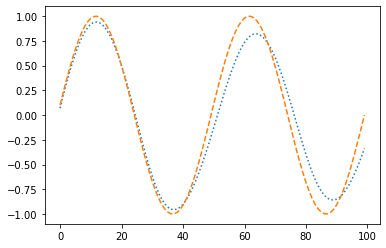

In [19]:
# Using predicted values to predict next step
X_pred = Xtest.copy()
for i in range(window,len(X_pred)):
    xin = X_pred[i-window:i].reshape((1, window, 1))
    X_pred[i] = m.predict(xin)

# Plot prediction vs actual for test data
plt.figure()
plt.plot(X_pred[window:],':',label='LSTM')
plt.plot(next_X1,'--',label='Actual')